In [1]:
import os
import pandas as pd
from ray.tune.visual_utils import load_results_to_df, generate_plotly_dim_dict

### Specify the directory where all your results are in the variable `RESULTS_DIR`.

In [2]:
RESULTS_DIR = '../../logs2/marketorderenv/hpsearch-ppo-aggressive/'

In [4]:
#RESULTS_DIR = os.path.expanduser("~/ray_results")
df = load_results_to_df(RESULTS_DIR)
[key for key in df]

Importing ../../logs2/marketorderenv/hpsearch-ppo-aggressive/PPO_MarketOrderEnv-v0_0_lr=0.005,num_sgd_iter=5,sgd_minibatch_size=1024,train_batch_size=10000_2019-02-17_09-48-12x145ob0c/result.json failed...Perhaps empty?
Traceback (most recent call last):
  File "/home/valldabo/miniconda3/envs/orderbookrl/lib/python3.6/site-packages/ray/tune/visual_utils.py", line 38, in _parse_results
    res_dict = _flatten_dict(json.loads(line.strip()))
UnboundLocalError: local variable 'line' referenced before assignment
Importing ../../logs2/marketorderenv/hpsearch-ppo-aggressive/PPO_MarketOrderEnv-v0_11_lr=0.0005,num_sgd_iter=30,sgd_minibatch_size=4096,train_batch_size=10000_2019-02-17_09-46-0624se74dl/result.json failed...Perhaps empty?
Traceback (most recent call last):
  File "/home/valldabo/miniconda3/envs/orderbookrl/lib/python3.6/site-packages/ray/tune/visual_utils.py", line 38, in _parse_results
    res_dict = _flatten_dict(json.loads(line.strip()))
UnboundLocalError: local variable 'line' 

['batch_mode',
 'callbacks:on_episode_end',
 'clip_param',
 'clip_rewards',
 'config:batch_mode',
 'config:callbacks:on_episode_end',
 'config:callbacks:on_episode_start',
 'config:callbacks:on_episode_step',
 'config:callbacks:on_sample_end',
 'config:callbacks:on_train_result',
 'config:clip_actions',
 'config:clip_param',
 'config:clip_rewards',
 'config:collect_metrics_timeout',
 'config:compress_observations',
 'config:entropy_coeff',
 'config:env',
 'config:env_config:max_episode_time',
 'config:env_config:max_sequence_skip',
 'config:env_config:random_start',
 'config:gamma',
 'config:grad_clip',
 'config:horizon',
 'config:input',
 'config:input_evaluation',
 'config:kl_coeff',
 'config:kl_target',
 'config:lambda',
 'config:local_evaluator_tf_session_args:inter_op_parallelism_threads',
 'config:local_evaluator_tf_session_args:intra_op_parallelism_threads',
 'config:log_level',
 'config:lr',
 'config:lr_schedule',
 'config:model:conv_activation',
 'config:model:conv_filters',
 

### Choose the fields you wish to visualize over in `GOOD_FIELDS`.

In [9]:
GOOD_FIELDS = ['train_batch_size',
               'sgd_minibatch_size',
               'num_sgd_iter',
               'lr',
               'custom_metrics:capital_return_mean']

visualization_df = df[GOOD_FIELDS]
visualization_df = visualization_df.dropna()
visualization_df.head()

,train_batch_size,sgd_minibatch_size,num_sgd_iter,lr,custom_metrics:capital_return_mean
0,40000,10000,10,0.0005,-0.887902
1,20000,1024,10,0.0005,-0.228341
3,10000,4096,30,0.0050,-0.200840
5,20000,10000,5,0.0050,-0.017267
6,40000,10000,30,0.0005,-0.060699


In [10]:
import statsmodels.api as sm

In [11]:
visualization_df.head()

,train_batch_size,sgd_minibatch_size,num_sgd_iter,lr,custom_metrics:capital_return_mean
0,40000,10000,10,0.0005,-0.887902
1,20000,1024,10,0.0005,-0.228341
3,10000,4096,30,0.0050,-0.200840
5,20000,10000,5,0.0050,-0.017267
6,40000,10000,30,0.0005,-0.060699


In [12]:
import statsmodels.api as sm

sm.OLS(
    visualization_df['custom_metrics:capital_return_mean'],
    sm.add_constant(visualization_df[[col for col in visualization_df if col != 'custom_metrics:capital_return_mean']])
    ).fit().summary()

/home/valldabo/miniconda3/envs/orderbookrl/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     custom_metrics:capital_return_mean   R-squared:                       0.418
Model:                                            OLS   Adj. R-squared:                  0.395
Method:                                 Least Squares   F-statistic:                     18.29
Date:                                Mon, 18 Feb 2019   Prob (F-statistic):           2.35e-11
Time:                                        21:56:00   Log-Likelihood:                 40.241
No. Observations:                                 107   AIC:                            -70.48
Df Residuals:                                     102   BIC:                            -57.12
Df Model:                                           4                                         
Covariance Type:                            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4196      0.052     -8.141      0.000      -0.522      -0.317
train_batch_size   -1.231e-06   1.32e-06     -0.930      0.355   -3.86e-06     1.4e-06
sgd_minibatch_size -4.439e-06   4.43e-06     -1.001      0.319   -1.32e-05    4.36e-06
num_sgd_iter           0.0072      0.002      4.681      0.000       0.004       0.010
lr                    50.9488      7.313      6.967      0.000      36.444      65.453
==============================================================================
Omnibus:                       21.938   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.636
Skew:                          -1.128   Prob(JB):                     9.97e-07
Kurtosis:                       4.054   Cond. No.                     1.19e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
visualization_df.sort_values(by='custom_metrics:capital_return_mean', ascending=False).head(20)

,train_batch_size,sgd_minibatch_size,num_sgd_iter,lr,custom_metrics:capital_return_mean
105,10000,1024,30,0.0050,-0.001455
21,20000,4096,30,0.0050,-0.005169
25,20000,1024,10,0.0050,-0.006008
118,10000,4096,30,0.0050,-0.006732
135,10000,1024,5,0.0050,-0.007452
79,10000,10000,30,0.0050,-0.008258
83,10000,4096,10,0.0050,-0.008507
145,10000,10000,30,0.0050,-0.010668
78,20000,10000,30,0.0050,-0.011404
73,40000,4096,30,0.0050,-0.012364


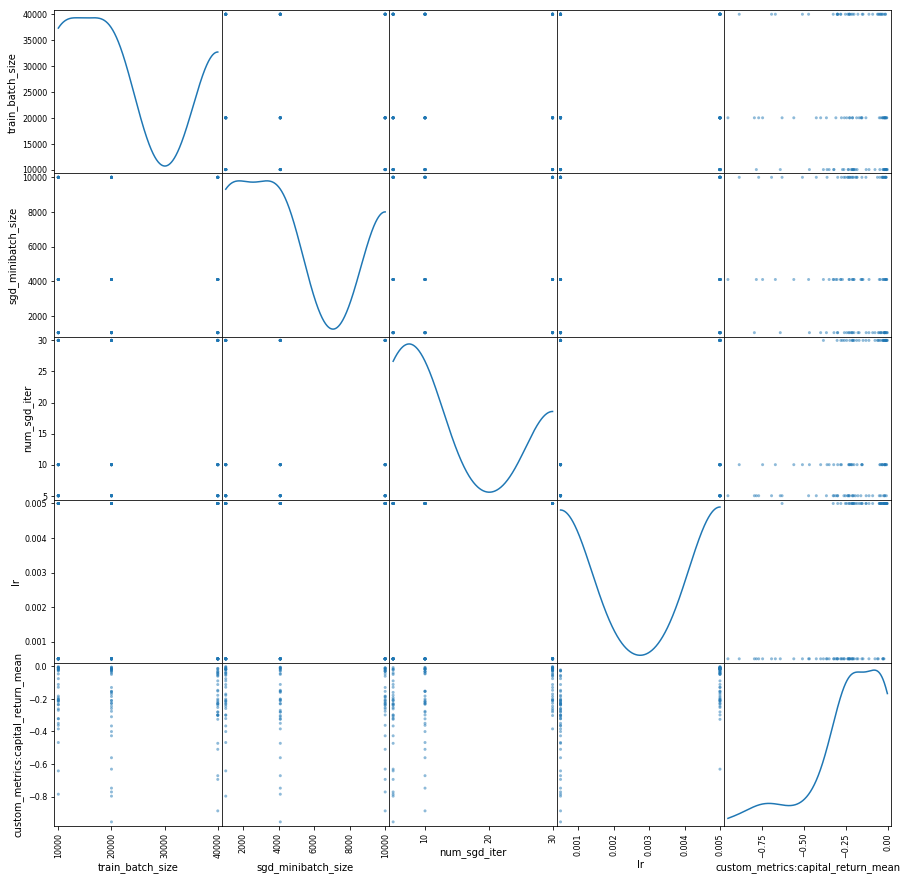

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(visualization_df, diagonal='kde', figsize=(15,15));

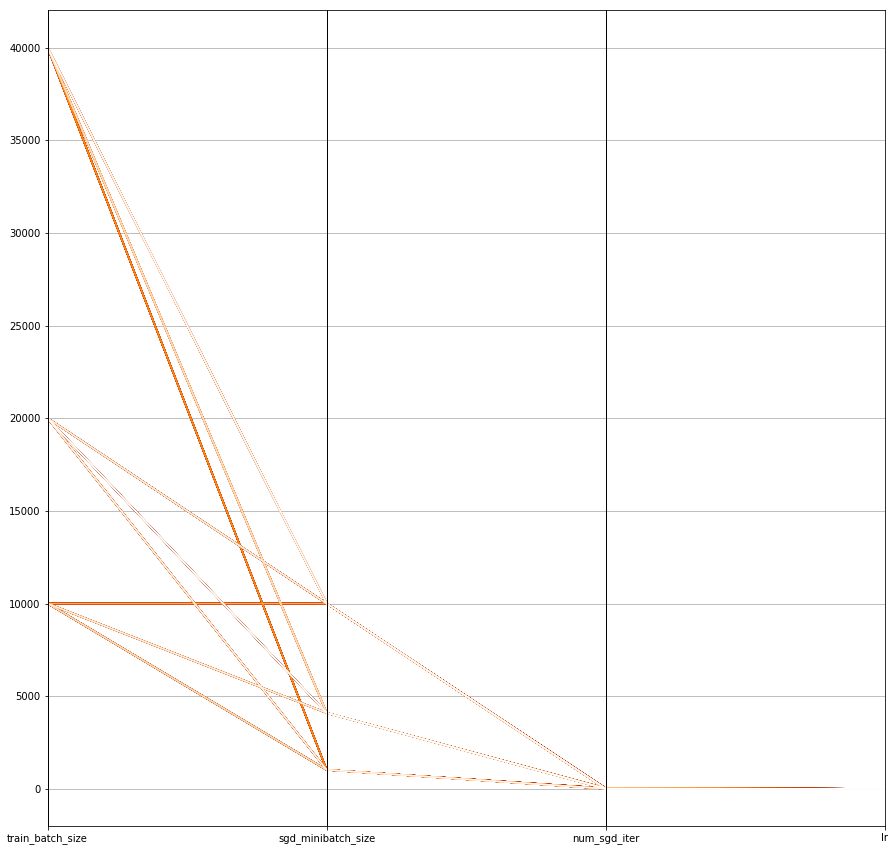

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import matplotlib.cm as cm
from pandas.plotting import parallel_coordinates

temp = visualization_df.copy(deep=True)
temp = temp.sort_values(by='custom_metrics:capital_return_mean', ascending=False)
#temp['custom_metrics:capital_return_mean'] = pd.cut(temp['custom_metrics:capital_return_mean'], 10)
colors = cm.get_cmap('gist_heat', temp['custom_metrics:capital_return_mean'].unique().size)
colors = [rgb2hex(colors(i)[:3]) for i in range(colors.N)]

fig, ax = plt.subplots(figsize=(15,15))
ax = parallel_coordinates(temp, color=colors, class_column='custom_metrics:capital_return_mean',sort_labels=False, ax=ax)
legend = ax.legend()
legend.remove()